# **Lasso Regression**

**Lasso (Least Absolute Shrinkage and Selection Operator) Regression** is a type of linear regression that introduces a penalty equal to the absolute value of the magnitude of the coefficients. This penalty forces some of the coefficients to become exactly zero, effectively performing feature selection. It’s a type of regularization technique used to prevent overfitting and simplify models by reducing the number of predictors.


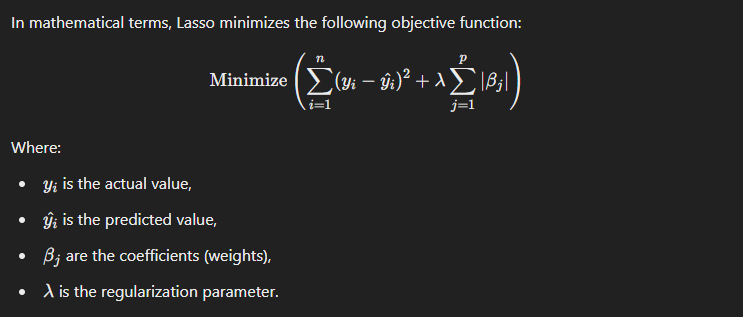

###  Why is Lasso Regression Important?

- **Feature Selection**: One of the unique advantages of Lasso is that it can shrink some coefficients to zero, essentially performing automatic feature selection. This is especially useful when dealing with datasets that have many irrelevant or redundant features.

- **Prevents Overfitting**: In models with too many features, Lasso reduces overfitting by shrinking coefficients, improving the model’s ability to generalize on unseen data.

- **Sparse Models**: By reducing coefficients to zero, Lasso simplifies the model, creating a sparse solution. Sparse models are easier to interpret and often have better prediction accuracy.

- **Works well with high-dimensional data**: In cases where the number of predictors exceeds the number of observations, Lasso is particularly useful because it selects only the most important predictors.

### How does Lasso Regression work?

The Lasso regression process follows these steps:

**1. Initialization**: Start by defining a linear regression model with a penalty on the magnitude of the coefficients. This penalty is controlled by a hyperparameter λ.

**2. Regularization**: Introduce the L1 penalty, which is the sum of the absolute values of the regression coefficients. Unlike traditional linear regression, which only minimizes the sum of squared errors, Lasso also minimizes the total size of the coefficients.

**3. Optimization**: Use optimization algorithms like coordinate descent to solve the Lasso objective function. The solver adjusts the coefficients to find the balance between fitting the data and shrinking some coefficients to zero.

**4. Coefficient Shrinkage**: Depending on the value of λ, some of the coefficients may be shrunk to exactly zero. The larger the value of 
λ, the stronger the regularization effect, meaning more features will be set to zero.

**5.Prediction**: After training, the resulting model can be used to predict outcomes based on the reduced set of features.

### When should you use Lasso Regression?

- **High-dimensional datasets**: When you have more features than observations, Lasso is a good choice because it selects a subset of the most important features, reducing the complexity of the model.

- **Feature Selection**: If you suspect that many of the features in your dataset are irrelevant, Lasso can help automatically select the relevant ones.

- **Overfitting prevention**: When you notice that your model is performing well on training data but poorly on validation or test data, Lasso can be a good solution as it reduces the chance of overfitting by regularizing the coefficients.

- **Sparse solutions**: If you need an interpretable model with fewer predictors, Lasso is suitable because it produces sparse models where some coefficients are zero.

### Who uses Lasso Regression?

- **Data Scientists and Machine Learning Engineers**: Especially when working on predictive modeling tasks that involve many features, Lasso is a popular tool for improving model generalizability and interpretability.

- **Researchers**: In fields like genomics, where the number of predictors can be vast, Lasso is frequently used to select important variables while disregarding the rest.

- **Statisticians**: Those dealing with linear regression models that have multicollinearity (high correlation between features) use Lasso to shrink the coefficients and combat the effects of collinearity.

### Key Points to Remember:

- The strength of the regularization is controlled by the hyperparameter 
λ (or alpha in Python's scikit-learn). The larger the value, the stronger the regularization.

- It’s a biased estimator, meaning it sacrifices some bias to reduce variance, leading to a better performance on test data (especially when overfitting is a concern).

- Lasso selects features and shrinks coefficients, making it a good choice for interpretable models.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

ca_housing = fetch_california_housing()

X = ca_housing.data
y = ca_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [2]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [3]:
y_pred = lasso.predict(X_test)
y_pred

array([2.06708162, 2.06708162, 2.06708162, ..., 2.06708162, 2.06708162,
       2.06708162])

In [4]:
mean_absolute_error(y_test, y_pred)

0.9119430573559844

In [5]:
root_mean_squared_error(y_test, y_pred)

1.1517022831067947

In [6]:
r2_score(y_test, y_pred)

-4.109353628090062e-05

In [7]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lasso_cv = GridSearchCV(lasso, param_grid, cv=3, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [8]:
y_pred2 = lasso_cv.predict(X_test)
y_pred2

array([2.72485002, 0.66011565, 2.12095357, ..., 1.92427048, 1.88073015,
       2.3150062 ])

In [9]:
mean_absolute_error(y_test, y_pred2)

0.5353500594399226

In [10]:
root_mean_squared_error(y_test, y_pred2)

0.7218861196454859

In [11]:
r2_score(y_test, y_pred2)

0.60710656378633

In [12]:
lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [13]:
lasso3 = Lasso(alpha=0.001)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.001)

In [14]:
lasso3.intercept_

2.0670816194279977

In [15]:
lasso3.coef_

array([ 0.83673788,  0.12126534, -0.26089701,  0.30370697, -0.00173652,
       -0.02849403, -0.8865986 , -0.86020295])

In [16]:
feature_names = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

df = pd.DataFrame({'Feature_Names': feature_names, 'Coef': lasso3.coef_})
df

,Feature_Names,Coef
0,MedInc,0.836738
1,HouseAge,0.121265
2,AveRooms,-0.260897
3,AveBedrms,0.303707
4,Population,-0.001737
5,AveOccup,-0.028494
6,Latitude,-0.886599
7,Longitude,-0.860203
